In [1]:
import skdim
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import torch
from plotly.subplots import make_subplots
from phd import get_phd, get_raw_phd
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import modeling_utils
if not hasattr(modeling_utils, "ALL_PARALLEL_STYLES") or modeling_utils.ALL_PARALLEL_STYLES is None:
    modeling_utils.ALL_PARALLEL_STYLES = ["tp", "none", "colwise", 'rowwise']

manifolds = truth.reset_index()['index'].values.tolist()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
benchmark = skdim.datasets.BenchmarkManifolds(random_state=0)
#dictionary with all datasets
dict_data = benchmark.generate()
#ground truth dataframe
truth = benchmark.truth
#generate a dataset with custom parameters
M1_sphere_custom = benchmark.generate(name="M1_Sphere",n=2500,dim=10,d=5)
truth = truth.reset_index()
M1_sphere = dict_data['M1_Sphere'] #np.array (n x dim)
truth



,index,Intrinsic Dimension,Number of variables,Description
0,M1_Sphere,10,11,10D sphere linearly embedded
1,M2_Affine_3to5,3,5,Affine space
2,M3_Nonlinear_4to6,4,6,"Concentrated figure, mistakable with a 3D one"
3,M4_Nonlinear,4,8,Nonlinear manifold
4,M5a_Helix1d,1,3,1D helix
5,M5b_Helix2d,2,3,2D helix
6,M6_Nonlinear,6,36,Nonlinear manifold
7,M7_Roll,2,3,Swiss Roll
8,M8_Nonlinear,12,72,Nonlinear (highly curved) manifold
9,M9_Affine,20,20,Affine space


### Делаем оценку PHD для разных alpha, разных многообразий и разного количество точек

In [15]:
def random_sample(arr: np.array, size: int = 1) -> np.array:
    return arr[np.random.choice(len(arr), size=size, replace=False)]


def get_raw_phd_in_loop(points, alpha, ntries=10):
    values = []
    for _ in range(ntries):
        values.append(get_raw_phd(points, alpha=alpha))

    return values


# np.random.seed(32443)
# manifolds = ['Mp3_Paraboloid', 'Mp2_Paraboloid', 'Mp1_Paraboloid', 'Mn2_Nonlinear', 'Mn1_Nonlinear', 'M6_Nonlinear']
manifold_name2df = dict()
for manifold_name in tqdm(manifolds):
    for n_dots in [dict_data[manifold_name].shape[0], dict_data[manifold_name].shape[0] // 2]:
        alpha2values = dict()
        manifold = random_sample(0.5 * (dict_data[manifold_name] + 1), n_dots)
        for alpha in tqdm([0.1, 0.5, 1, 2, 3]):
            alpha2values[alpha] = get_raw_phd_in_loop(manifold, alpha, 30)
        df = pd.DataFrame(alpha2values).assign(n_dots=n_dots).assign(manifold_name=manifold_name)
        manifold_name2df[manifold_name + str(n_dots)] = df


lst = []
for key, value in manifold_name2df.items():
    lst.append(value.assign(manifold_name_full=key))
df_concat = pd.concat(lst)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 20%|█████████                                    | 1/5 [01:07<04:31, 67.85s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 40%|██████████████████                           | 2/5 [02:16<03:24, 68.17s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 60%|███████████████████████████                  | 3/5 [03:24<02:15, 67.99s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 80%|████████████████████████████████████         | 4/5 [04:31<01:07, 67.85s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


100%|█████████████████████████████████████████████| 5/5 [05:38<00:00, 67.75s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 20%|█████████                                    | 1/5 [00:29<01:59, 29.86s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 40%|██████████████████                           | 2/5 [00:59<01:29, 29.75s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 60%|███████████████████████████                  | 3/5 [01:28<00:59, 29.54s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 80%|████████████████████████████████████         | 4/5 [01:57<00:29, 29.29s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points = 


 20%|█████████                                    | 1/5 [01:09<04:37, 69.38s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points = 


 40%|██████████████████                           | 2/5 [02:18<03:26, 68.99s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:26<02:17, 68.78s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:35<01:08, 68.85s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 5)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:44<00:00, 68.85s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points = 


 20%|█████████                                    | 1/5 [00:29<01:58, 29.72s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points = 


 40%|██████████████████                           | 2/5 [00:59<01:29, 29.69s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:29<00:59, 29.83s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [01:59<00:29, 29.93s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 5)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points = 


 20%|█████████                                    | 1/5 [01:07<04:31, 67.78s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points = 


 40%|██████████████████                           | 2/5 [02:15<03:24, 68.03s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:24<02:16, 68.12s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:31<01:07, 67.96s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 6)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:39<00:00, 67.98s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points = 


 20%|█████████                                    | 1/5 [00:30<02:00, 30.04s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points = 


 40%|██████████████████                           | 2/5 [00:59<01:29, 29.81s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:29<00:59, 29.75s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [01:58<00:29, 29.64s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 6)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points = 


 20%|█████████                                    | 1/5 [01:08<04:32, 68.08s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points = 


 40%|██████████████████                           | 2/5 [02:14<03:21, 67.31s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:22<02:15, 67.58s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:29<01:07, 67.40s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 8)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:37<00:00, 67.45s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points = 


 20%|█████████                                    | 1/5 [00:29<01:58, 29.60s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points = 


 40%|██████████████████                           | 2/5 [00:59<01:28, 29.66s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:29<00:59, 29.70s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [01:58<00:29, 29.69s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 8)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 20%|█████████                                    | 1/5 [01:08<04:35, 68.99s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [02:17<03:26, 68.79s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:26<02:17, 68.73s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:34<01:08, 68.61s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:44<00:00, 68.83s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 20%|█████████                                    | 1/5 [00:29<01:59, 29.94s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [01:00<01:30, 30.05s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:30<01:00, 30.28s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [02:00<00:30, 30.14s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 20%|█████████                                    | 1/5 [01:09<04:36, 69.04s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [02:17<03:26, 68.84s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:26<02:17, 68.66s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:34<01:08, 68.67s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:43<00:00, 68.76s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 20%|█████████                                    | 1/5 [00:29<01:59, 29.95s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [00:59<01:29, 29.80s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:29<00:59, 29.93s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [01:59<00:29, 29.80s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


 20%|█████████                                    | 1/5 [01:04<04:16, 64.24s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


 40%|██████████████████                           | 2/5 [02:06<03:09, 63.08s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


 60%|███████████████████████████                  | 3/5 [03:10<02:06, 63.30s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


 80%|████████████████████████████████████         | 4/5 [04:14<01:03, 63.80s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


100%|█████████████████████████████████████████████| 5/5 [05:18<00:00, 63.74s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)


 20%|█████████                                    | 1/5 [00:28<01:53, 28.29s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)


 40%|██████████████████                           | 2/5 [00:55<01:23, 27.79s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)


 60%|███████████████████████████                  | 3/5 [01:23<00:55, 27.64s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)


 80%|████████████████████████████████████         | 4/5 [01:50<00:27, 27.34s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 36)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 20%|█████████                                    | 1/5 [01:10<04:40, 70.06s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [02:21<03:33, 71.12s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:32<02:21, 70.84s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:41<01:10, 70.33s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:52<00:00, 70.55s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 20%|█████████                                    | 1/5 [00:30<02:02, 30.58s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [01:01<01:32, 30.68s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:32<01:01, 30.85s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [02:02<00:30, 30.74s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 20%|█████████                                    | 1/5 [01:11<04:47, 71.77s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 40%|██████████████████                           | 2/5 [02:19<03:29, 69.68s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 60%|███████████████████████████                  | 3/5 [03:30<02:20, 70.14s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 80%|████████████████████████████████████         | 4/5 [04:42<01:10, 70.79s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


100%|█████████████████████████████████████████████| 5/5 [05:52<00:00, 70.47s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 20%|█████████                                    | 1/5 [00:25<01:42, 25.53s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 40%|██████████████████                           | 2/5 [00:50<01:16, 25.44s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 60%|███████████████████████████                  | 3/5 [01:16<00:51, 25.54s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 80%|████████████████████████████████████         | 4/5 [01:42<00:25, 25.58s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 20%|█████████                                    | 1/5 [01:03<04:13, 63.45s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 40%|██████████████████                           | 2/5 [02:06<03:10, 63.43s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 60%|███████████████████████████                  | 3/5 [03:09<02:06, 63.05s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 80%|████████████████████████████████████         | 4/5 [04:12<01:03, 63.07s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


100%|█████████████████████████████████████████████| 5/5 [05:16<00:00, 63.21s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 20%|█████████                                    | 1/5 [00:27<01:49, 27.46s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 40%|██████████████████                           | 2/5 [00:54<01:22, 27.38s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 60%|███████████████████████████                  | 3/5 [01:22<00:54, 27.36s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 80%|████████████████████████████████████         | 4/5 [01:49<00:27, 27.54s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 20%|█████████                                    | 1/5 [01:05<04:21, 65.49s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 40%|██████████████████                           | 2/5 [02:11<03:17, 65.67s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 60%|███████████████████████████                  | 3/5 [03:16<02:11, 65.55s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


 80%|████████████████████████████████████         | 4/5 [04:22<01:05, 65.52s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 11)


100%|█████████████████████████████████████████████| 5/5 [05:28<00:00, 65.62s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 20%|█████████                                    | 1/5 [00:28<01:53, 28.48s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 40%|██████████████████                           | 2/5 [00:57<01:25, 28.62s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 60%|███████████████████████████                  | 3/5 [01:25<00:57, 28.65s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


 80%|████████████████████████████████████         | 4/5 [01:54<00:28, 28.79s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 11)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)


 20%|█████████                                    | 1/5 [01:03<04:14, 63.73s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)


 40%|██████████████████                           | 2/5 [02:07<03:11, 63.94s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)


 60%|███████████████████████████                  | 3/5 [03:12<02:08, 64.18s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)


 80%|████████████████████████████████████         | 4/5 [04:16<01:04, 64.00s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 18)


100%|█████████████████████████████████████████████| 5/5 [05:19<00:00, 63.86s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)


 20%|█████████                                    | 1/5 [00:27<01:51, 27.76s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)


 40%|██████████████████                           | 2/5 [00:55<01:22, 27.60s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)


 60%|███████████████████████████                  | 3/5 [01:22<00:55, 27.66s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)


 80%|████████████████████████████████████         | 4/5 [01:50<00:27, 27.75s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 18)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)


 20%|█████████                                    | 1/5 [01:02<04:11, 62.87s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)


 40%|██████████████████                           | 2/5 [02:07<03:10, 63.62s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)


 60%|███████████████████████████                  | 3/5 [03:11<02:08, 64.01s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)


 80%|████████████████████████████████████         | 4/5 [04:14<01:03, 63.77s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 25)


100%|█████████████████████████████████████████████| 5/5 [05:18<00:00, 63.67s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)


 20%|█████████                                    | 1/5 [00:27<01:48, 27.10s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)


 40%|██████████████████                           | 2/5 [00:54<01:21, 27.23s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)


 60%|███████████████████████████                  | 3/5 [01:21<00:54, 27.30s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)


 80%|████████████████████████████████████         | 4/5 [01:48<00:27, 27.22s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 25)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)


 20%|█████████                                    | 1/5 [01:10<04:42, 70.64s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)


 40%|██████████████████                           | 2/5 [02:21<03:32, 70.86s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)


 60%|███████████████████████████                  | 3/5 [03:30<02:20, 70.15s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)


 80%|████████████████████████████████████         | 4/5 [04:40<01:10, 70.06s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 71)


100%|█████████████████████████████████████████████| 5/5 [05:51<00:00, 70.23s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)


 20%|█████████                                    | 1/5 [00:25<01:42, 25.61s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)


 40%|██████████████████                           | 2/5 [00:51<01:16, 25.58s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)


 60%|███████████████████████████                  | 3/5 [01:16<00:51, 25.60s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)


 80%|████████████████████████████████████         | 4/5 [01:42<00:25, 25.46s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 71)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 20%|█████████                                    | 1/5 [01:08<04:35, 68.81s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [02:17<03:26, 68.82s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:26<02:17, 68.89s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:35<01:08, 68.70s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:43<00:00, 68.72s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 20%|█████████                                    | 1/5 [00:29<01:59, 29.99s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [01:00<01:30, 30.05s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:30<01:00, 30.14s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [02:00<00:30, 30.05s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 20%|█████████                                    | 1/5 [01:03<04:12, 63.24s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 40%|██████████████████                           | 2/5 [02:05<03:08, 62.88s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 60%|███████████████████████████                  | 3/5 [03:09<02:06, 63.02s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


 80%|████████████████████████████████████         | 4/5 [04:12<01:02, 63.00s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 20)


100%|█████████████████████████████████████████████| 5/5 [05:14<00:00, 62.98s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 20%|█████████                                    | 1/5 [00:27<01:49, 27.38s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 40%|██████████████████                           | 2/5 [00:55<01:23, 27.67s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 60%|███████████████████████████                  | 3/5 [01:22<00:55, 27.66s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


 80%|████████████████████████████████████         | 4/5 [01:49<00:27, 27.38s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 20)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 20%|█████████                                    | 1/5 [01:08<04:35, 68.94s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [02:17<03:25, 68.57s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [03:25<02:17, 68.51s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [04:34<01:08, 68.58s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 3)
mn_points = 


100%|█████████████████████████████████████████████| 5/5 [05:42<00:00, 68.54s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 20%|█████████                                    | 1/5 [00:29<01:59, 29.93s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 40%|██████████████████                           | 2/5 [00:59<01:28, 29.57s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 60%|███████████████████████████                  | 3/5 [01:28<00:59, 29.52s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


 80%|████████████████████████████████████         | 4/5 [01:58<00:29, 29.72s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 3)
mn_points = 


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)


 20%|█████████                                    | 1/5 [01:04<04:19, 64.88s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)


 40%|██████████████████                           | 2/5 [02:09<03:14, 64.93s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)


 60%|███████████████████████████                  | 3/5 [03:14<02:09, 64.92s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)


 80%|████████████████████████████████████         | 4/5 [04:19<01:04, 64.87s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 13)


100%|█████████████████████████████████████████████| 5/5 [05:24<00:00, 64.97s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)


 20%|█████████                                    | 1/5 [00:28<01:53, 28.40s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)


 40%|██████████████████                           | 2/5 [00:56<01:25, 28.39s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)


 60%|███████████████████████████                  | 3/5 [01:24<00:56, 28.31s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)


 80%|████████████████████████████████████         | 4/5 [01:53<00:28, 28.23s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 13)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)


 20%|█████████                                    | 1/5 [01:03<04:12, 63.07s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)


 40%|██████████████████                           | 2/5 [02:06<03:10, 63.54s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)


 60%|███████████████████████████                  | 3/5 [03:09<02:06, 63.24s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)


 80%|████████████████████████████████████         | 4/5 [04:14<01:03, 63.66s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)


100%|█████████████████████████████████████████████| 5/5 [05:16<00:00, 63.32s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)


 20%|█████████                                    | 1/5 [00:26<01:45, 26.47s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)


 40%|██████████████████                           | 2/5 [00:52<01:19, 26.34s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)


 60%|███████████████████████████                  | 3/5 [01:18<00:52, 26.22s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)


 80%|████████████████████████████████████         | 4/5 [01:45<00:26, 26.22s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 40)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 20%|█████████                                    | 1/5 [01:06<04:27, 66.88s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 40%|██████████████████                           | 2/5 [02:14<03:22, 67.58s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 60%|███████████████████████████                  | 3/5 [03:23<02:15, 67.98s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 80%|████████████████████████████████████         | 4/5 [04:32<01:08, 68.53s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


100%|█████████████████████████████████████████████| 5/5 [05:40<00:00, 68.10s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 20%|█████████                                    | 1/5 [00:25<01:42, 25.59s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 40%|██████████████████                           | 2/5 [00:50<01:16, 25.41s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 60%|███████████████████████████                  | 3/5 [01:15<00:50, 25.14s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


 80%|████████████████████████████████████         | 4/5 [01:42<00:25, 25.61s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 72)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


 20%|█████████                                    | 1/5 [01:15<05:01, 75.44s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


 40%|██████████████████                           | 2/5 [02:29<03:44, 74.91s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


 60%|███████████████████████████                  | 3/5 [03:43<02:28, 74.48s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


 80%|████████████████████████████████████         | 4/5 [04:58<01:14, 74.31s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


100%|█████████████████████████████████████████████| 5/5 [06:13<00:00, 74.78s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)


 20%|█████████                                    | 1/5 [00:25<01:40, 25.07s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)


 40%|██████████████████                           | 2/5 [00:49<01:13, 24.60s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)


 60%|███████████████████████████                  | 3/5 [01:14<00:49, 24.96s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)


 80%|████████████████████████████████████         | 4/5 [01:39<00:24, 24.94s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 96)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


 20%|█████████                                    | 1/5 [01:05<04:20, 65.21s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


 40%|██████████████████                           | 2/5 [02:10<03:16, 65.54s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


 60%|███████████████████████████                  | 3/5 [03:15<02:10, 65.21s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


 80%|████████████████████████████████████         | 4/5 [04:21<01:05, 65.23s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


100%|█████████████████████████████████████████████| 5/5 [05:27<00:00, 65.43s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)


 20%|█████████                                    | 1/5 [00:28<01:54, 28.57s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)


 40%|██████████████████                           | 2/5 [00:56<01:25, 28.47s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)


 60%|███████████████████████████                  | 3/5 [01:25<00:56, 28.34s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)


 80%|████████████████████████████████████         | 4/5 [01:53<00:28, 28.51s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 12)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


 20%|█████████                                    | 1/5 [01:03<04:14, 63.55s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


 40%|██████████████████                           | 2/5 [02:07<03:11, 63.81s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


 60%|███████████████████████████                  | 3/5 [03:11<02:07, 63.93s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


 80%|████████████████████████████████████         | 4/5 [04:15<01:03, 63.76s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


100%|█████████████████████████████████████████████| 5/5 [05:17<00:00, 63.54s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)


 20%|█████████                                    | 1/5 [00:27<01:49, 27.41s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)


 40%|██████████████████                           | 2/5 [00:55<01:22, 27.52s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)


 60%|███████████████████████████                  | 3/5 [01:22<00:55, 27.62s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)


 80%|████████████████████████████████████         | 4/5 [01:50<00:27, 27.70s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 21)


  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


 20%|█████████                                    | 1/5 [01:03<04:15, 63.80s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


 40%|██████████████████                           | 2/5 [02:06<03:09, 63.27s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


 60%|███████████████████████████                  | 3/5 [03:11<02:07, 63.94s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


 80%|████████████████████████████████████         | 4/5 [04:16<01:04, 64.47s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


100%|█████████████████████████████████████████████| 5/5 [05:20<00:00, 64.01s/it]

  0%|                                                     | 0/5 [00:00<?, ?it/s]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)


 20%|█████████                                    | 1/5 [00:27<01:48, 27.12s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)


 40%|██████████████████                           | 2/5 [00:53<01:20, 26.91s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)


 60%|███████████████████████████                  | 3/5 [01:20<00:53, 26.80s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)


 80%|████████████████████████████████████         | 4/5 [01:47<00:26, 26.79s/it]

mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)
mn_points =  40 max_points =  1250 point_jump =  172
input_shape: (1250, 30)


100%|████████████████████████████████████████| 24/24 [3:09:56<00:00, 474.87s/it]


### Визуализация

M1_Sphere2500


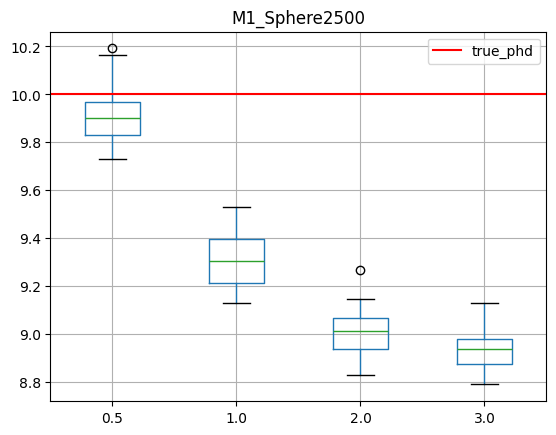

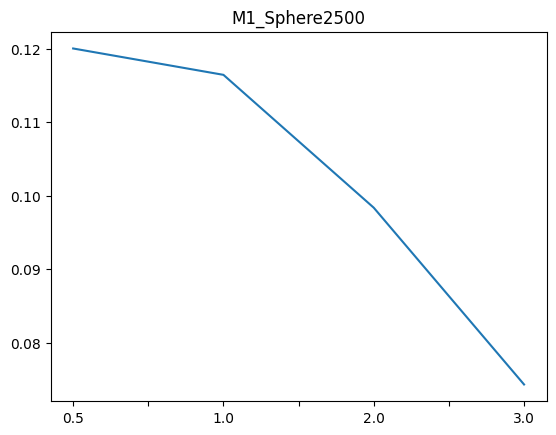

M1_Sphere1250


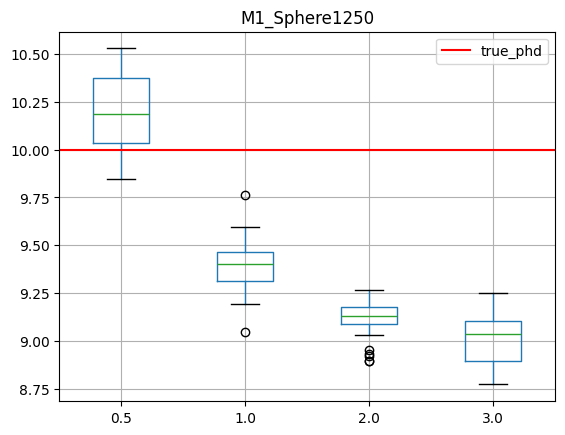

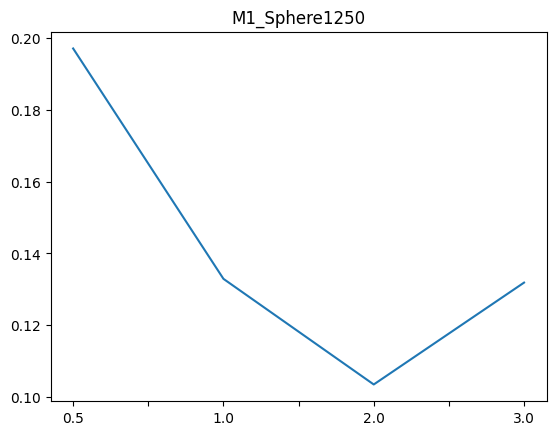

M2_Affine_3to52500


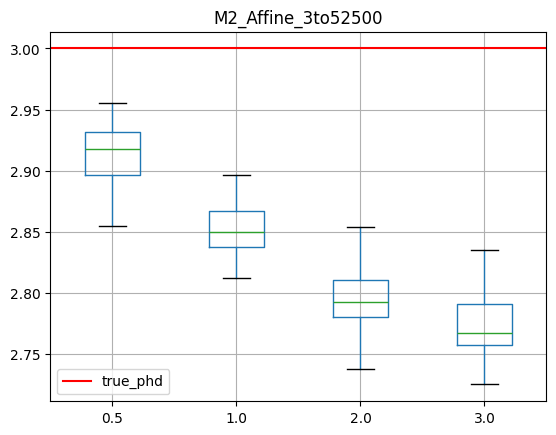

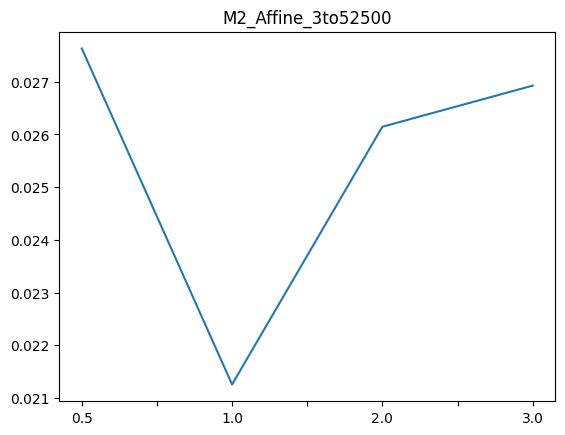

M2_Affine_3to51250


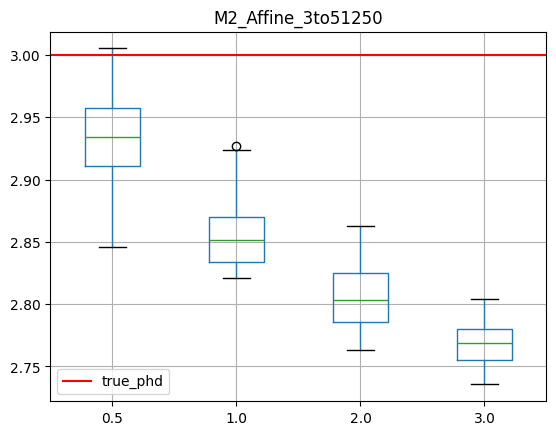

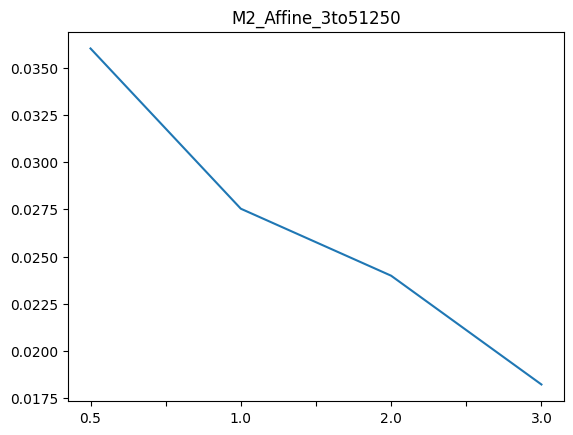

M3_Nonlinear_4to62500


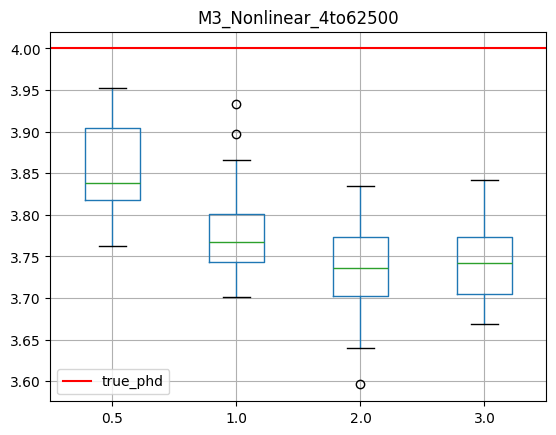

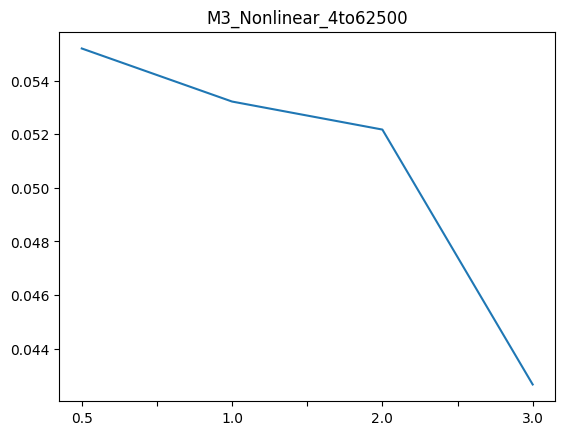

M3_Nonlinear_4to61250


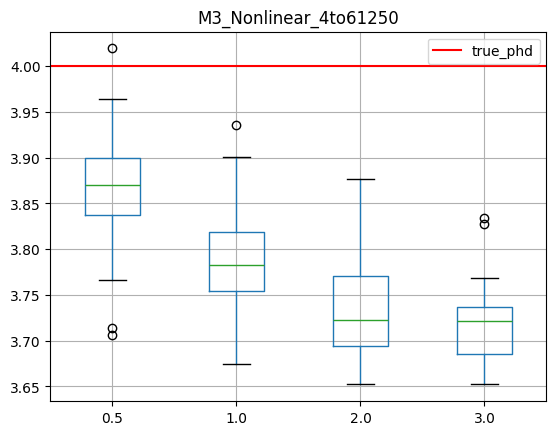

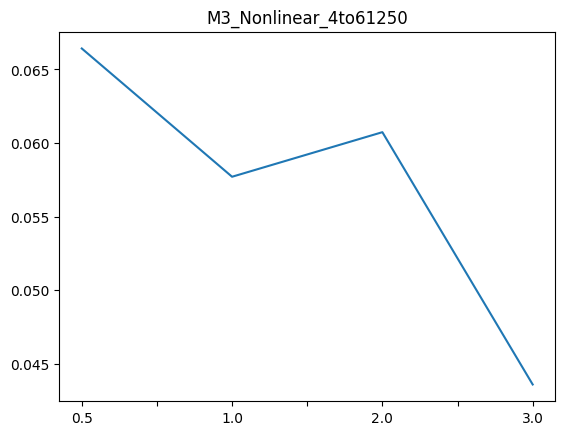

M4_Nonlinear2500


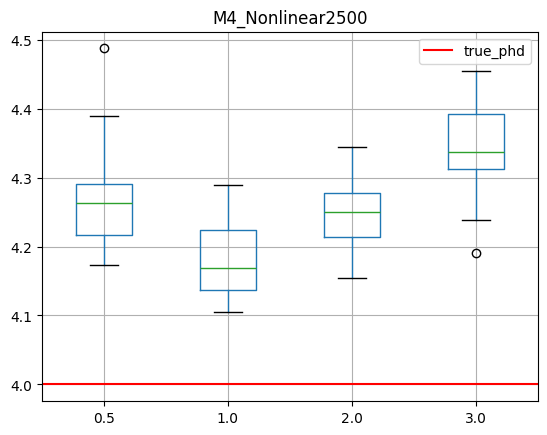

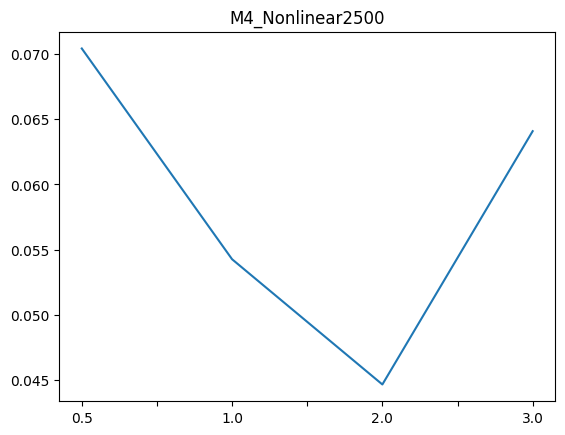

M4_Nonlinear1250


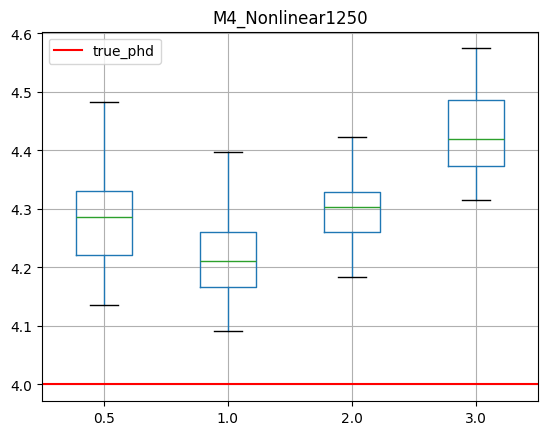

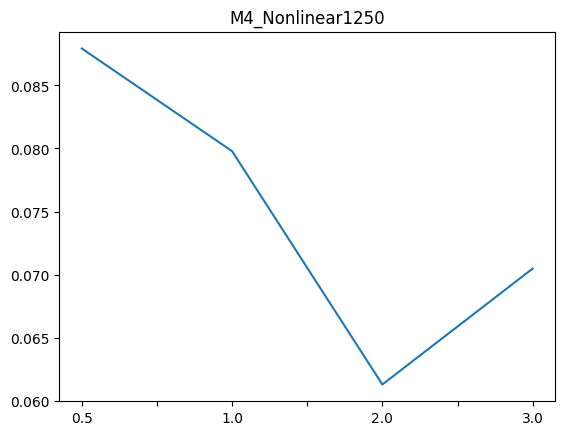

M5a_Helix1d2500


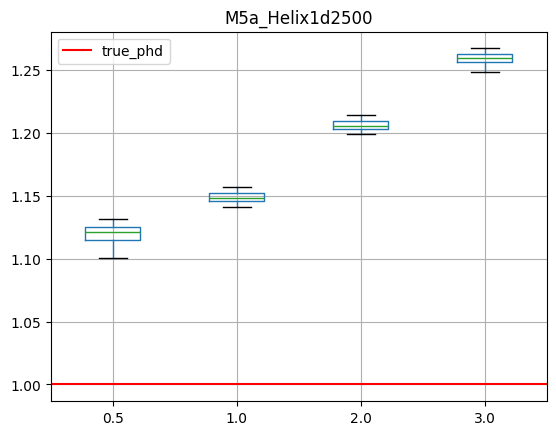

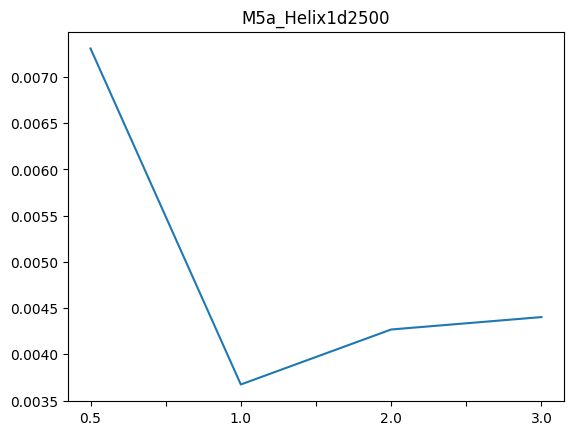

M5a_Helix1d1250


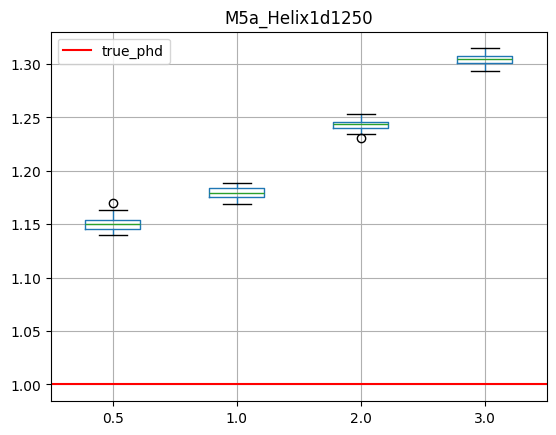

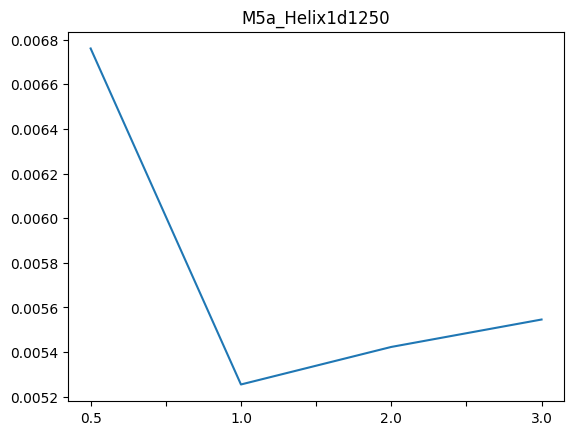

M5b_Helix2d2500


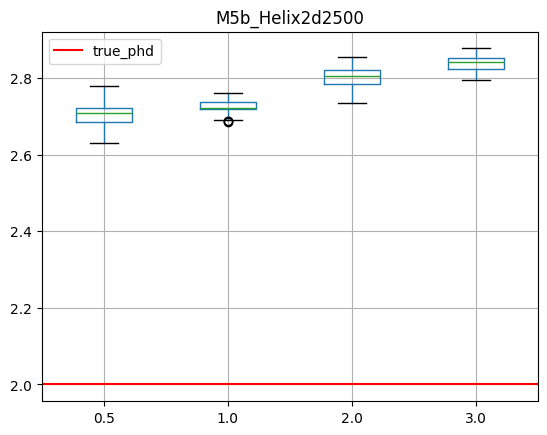

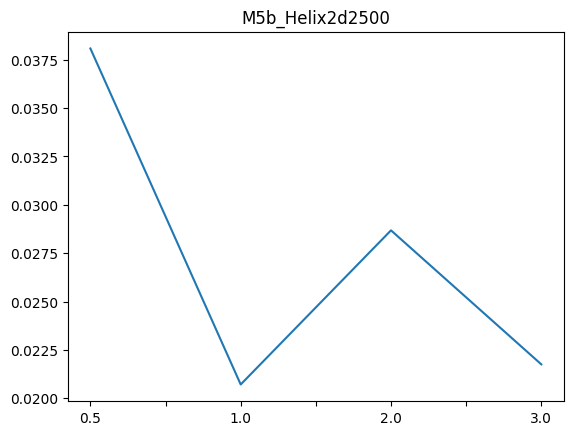

M5b_Helix2d1250


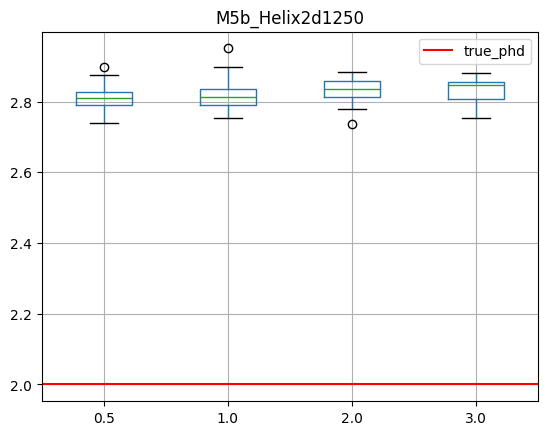

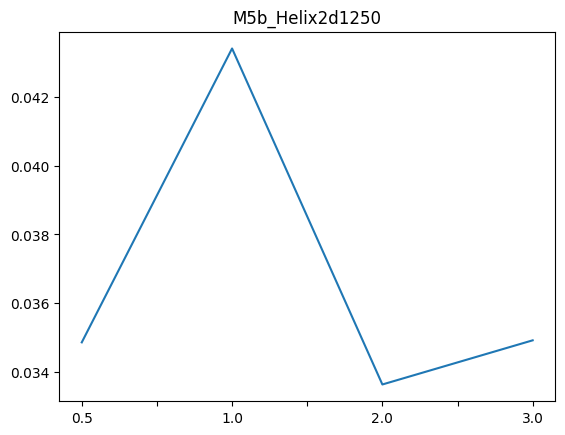

M6_Nonlinear2500


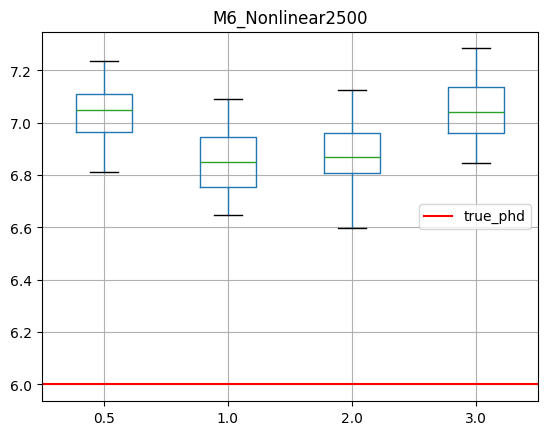

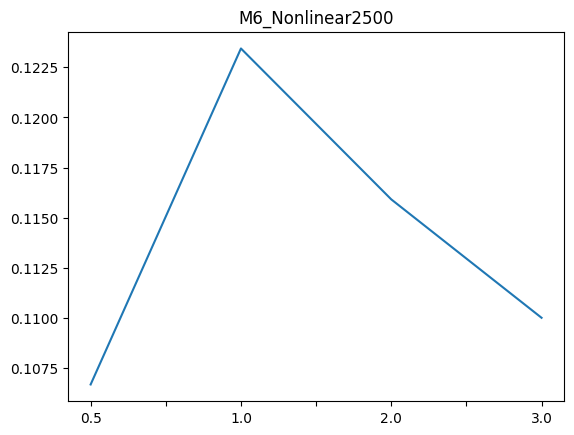

M6_Nonlinear1250


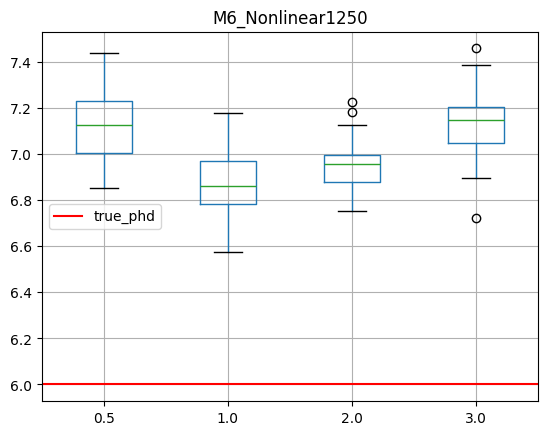

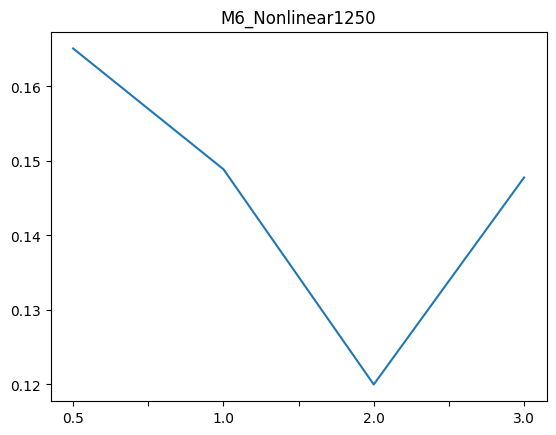

M7_Roll2500


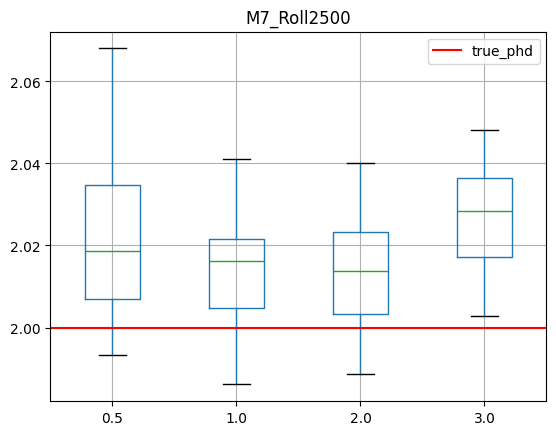

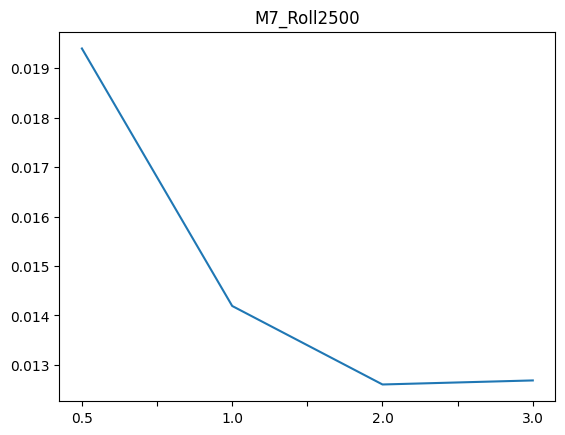

M7_Roll1250


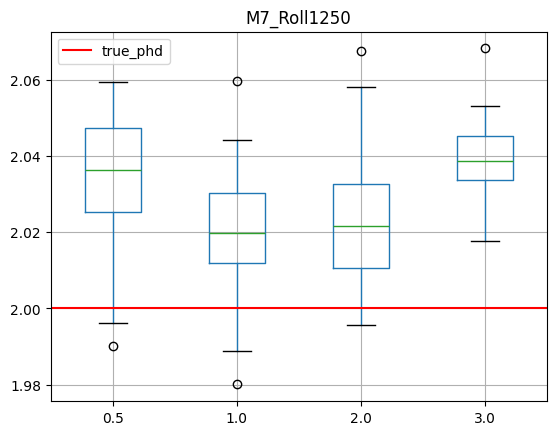

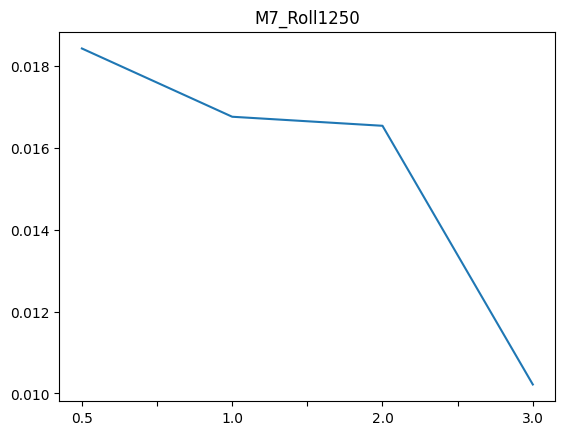

M8_Nonlinear2500


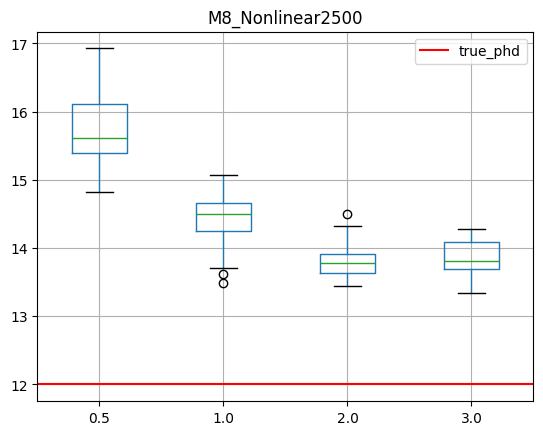

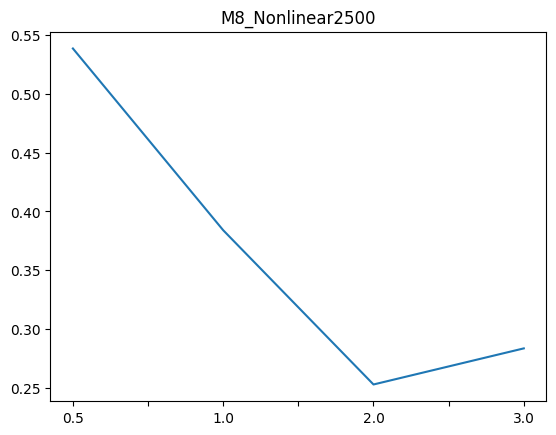

M8_Nonlinear1250


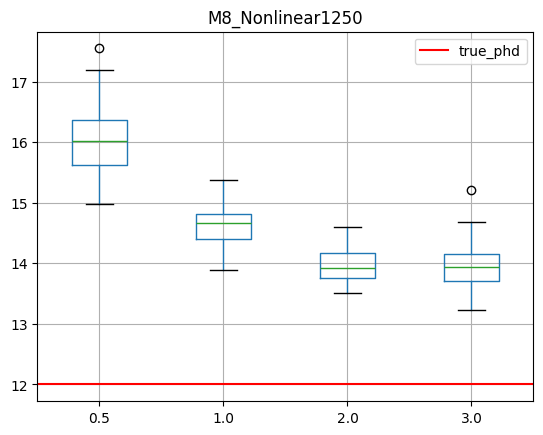

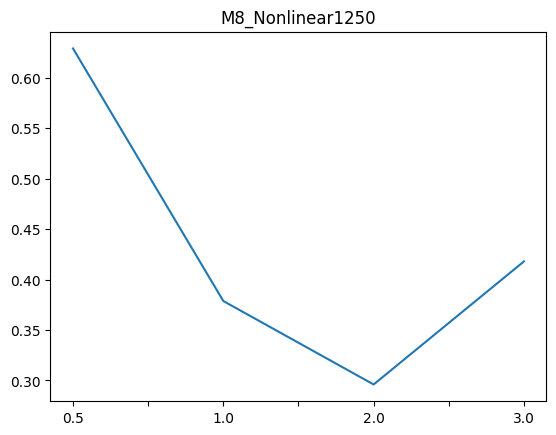

M9_Affine2500


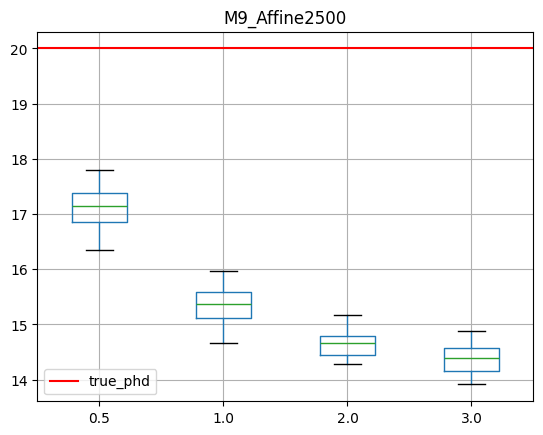

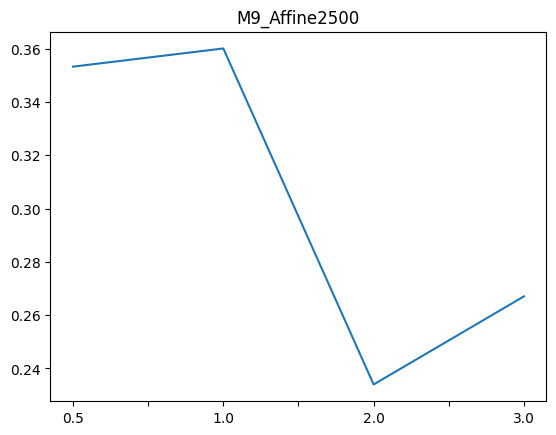

M9_Affine1250


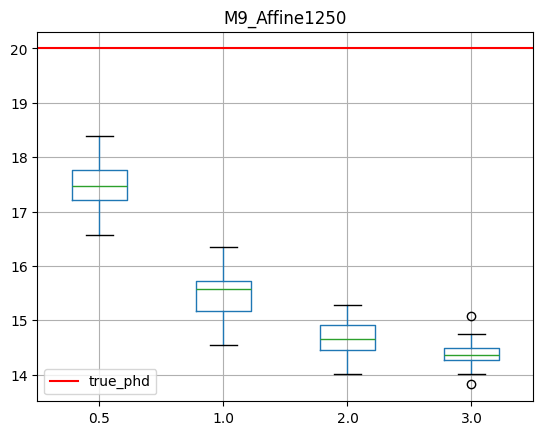

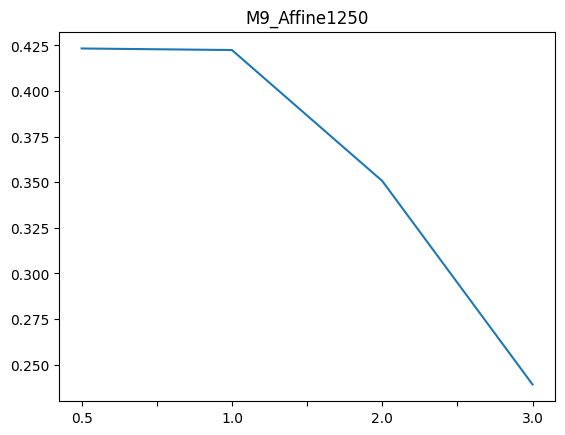

M10a_Cubic2500


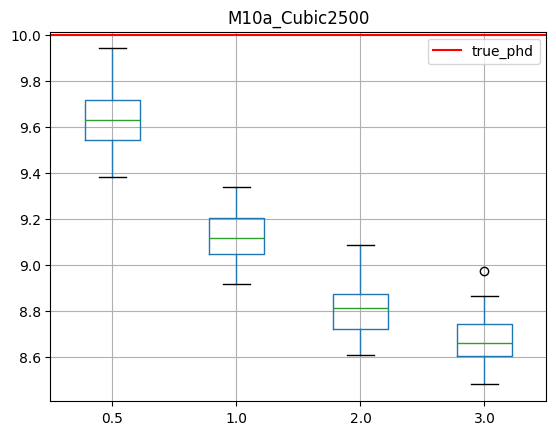

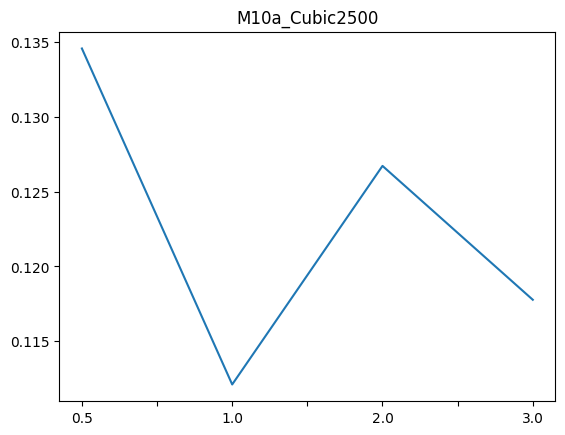

M10a_Cubic1250


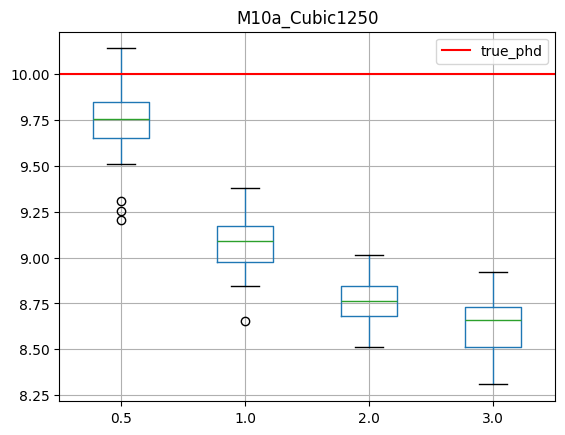

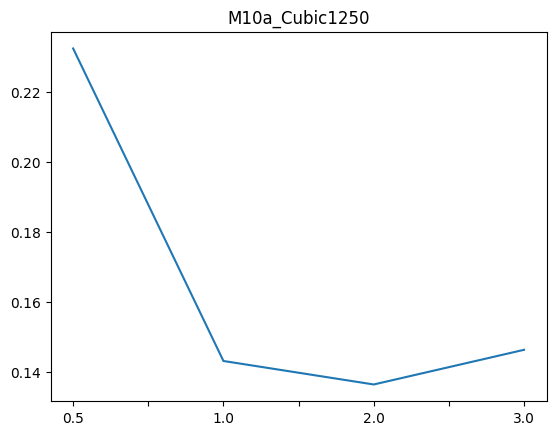

M10b_Cubic2500


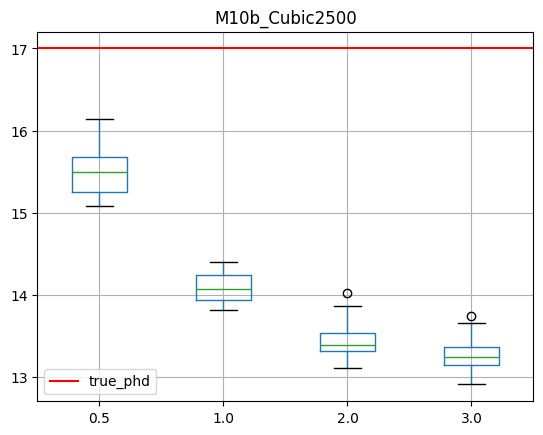

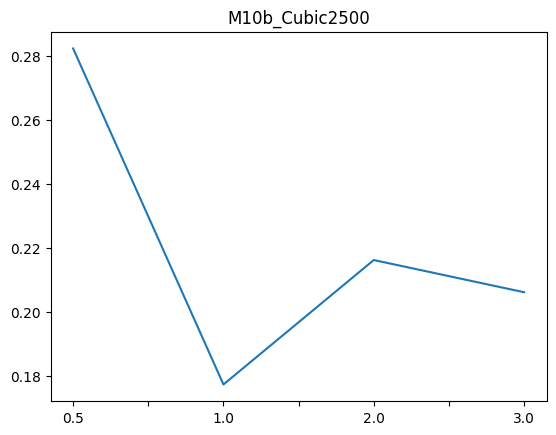

M10b_Cubic1250


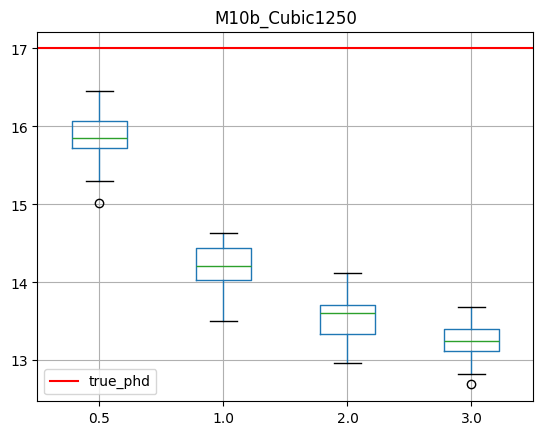

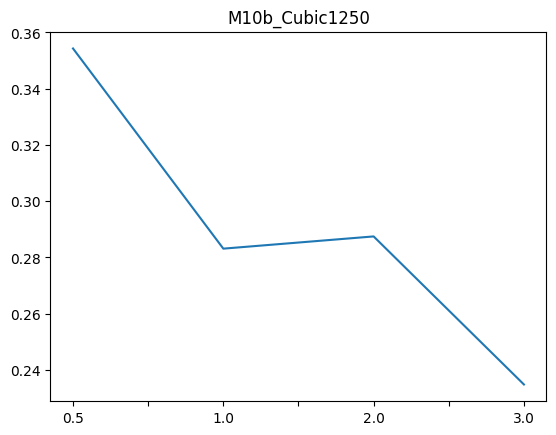

M10c_Cubic2500


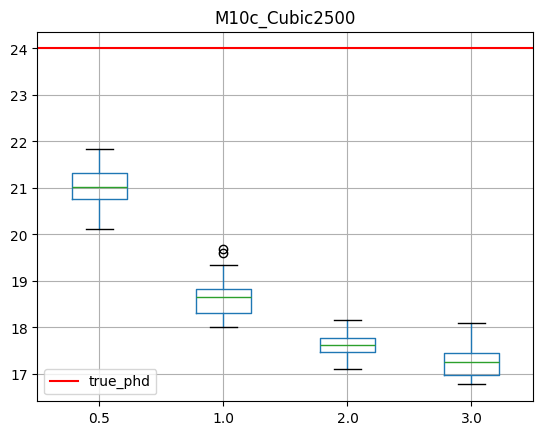

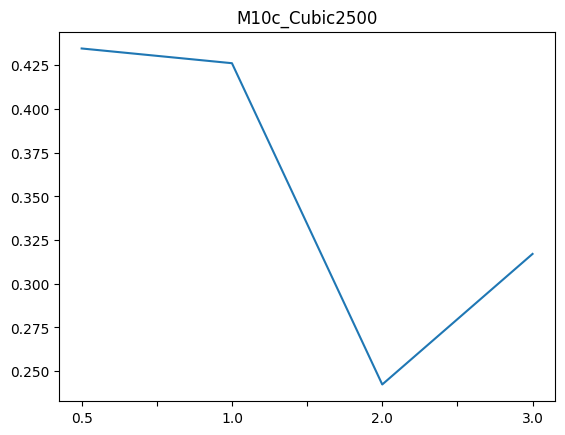

M10c_Cubic1250


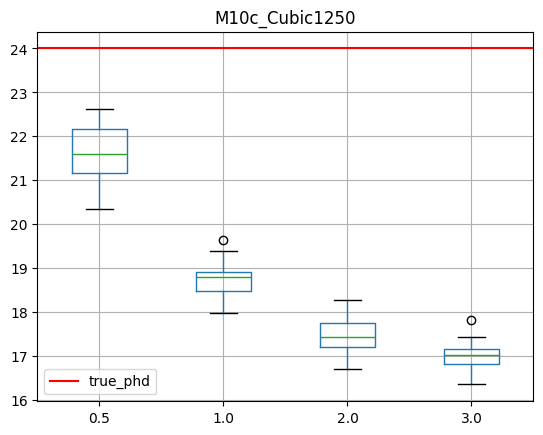

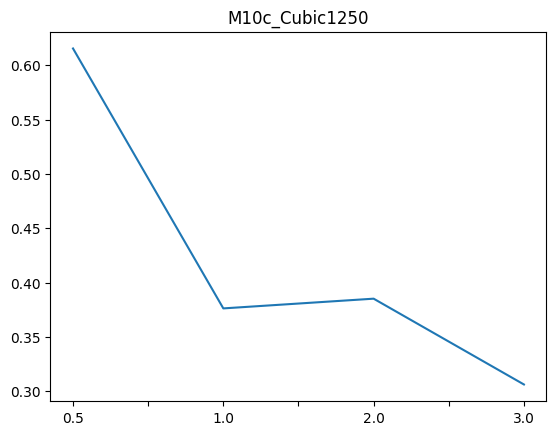

M10d_Cubic2500


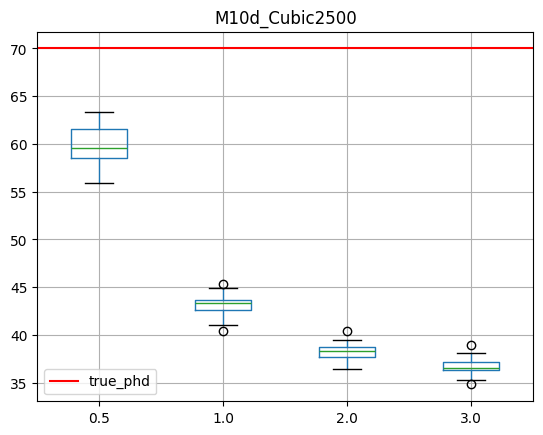

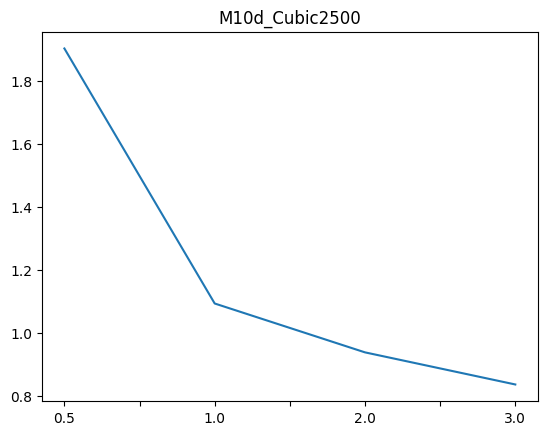

M10d_Cubic1250


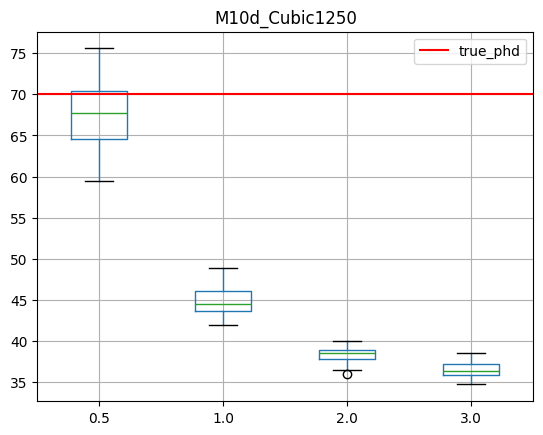

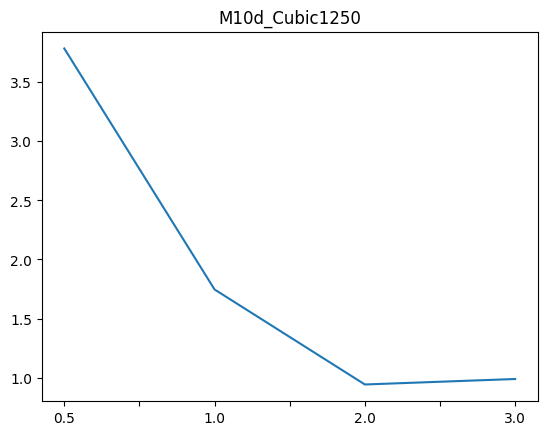

M11_Moebius2500


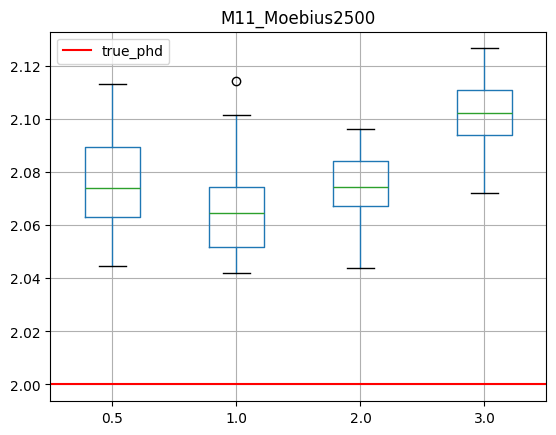

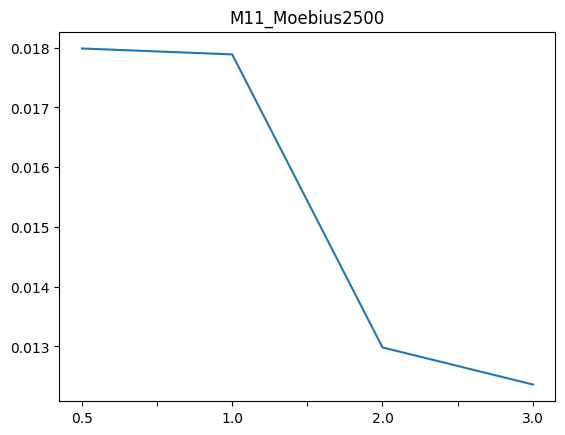

M11_Moebius1250


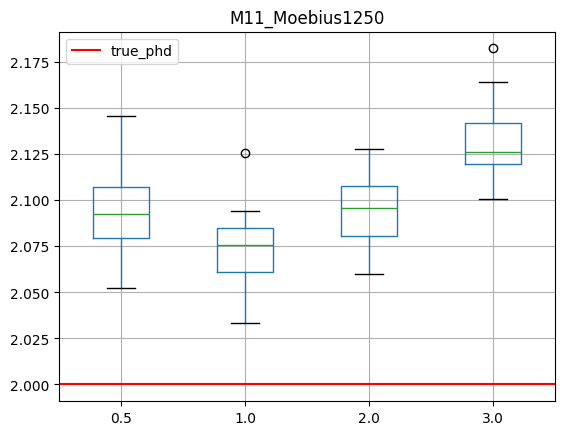

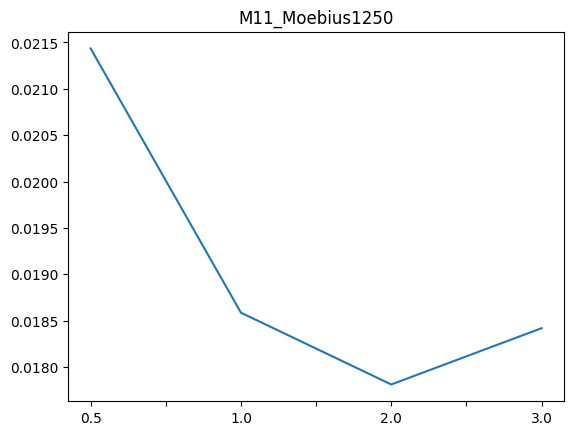

M12_Norm2500


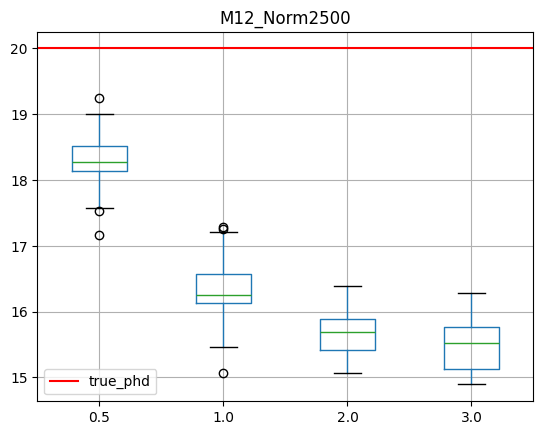

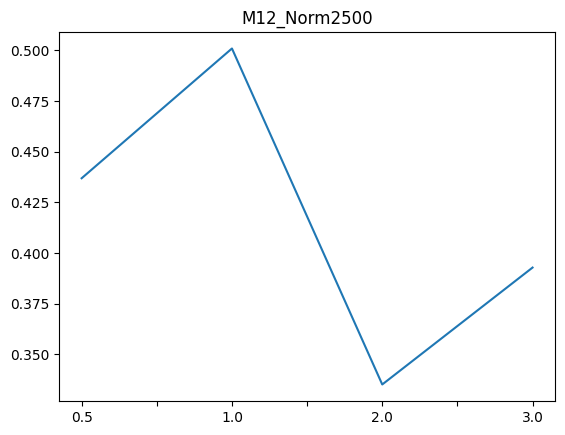

M12_Norm1250


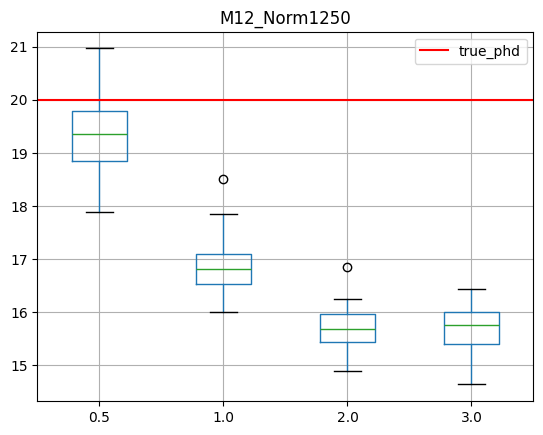

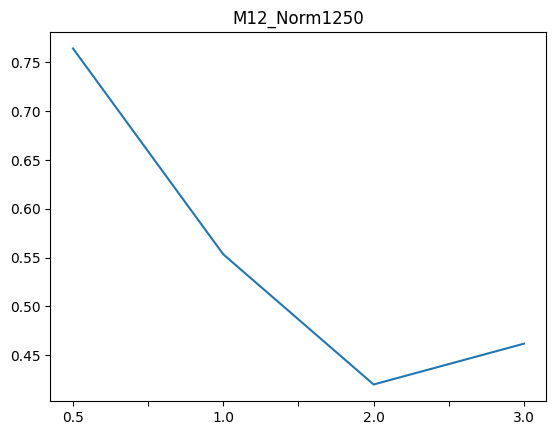

M13a_Scurve2500


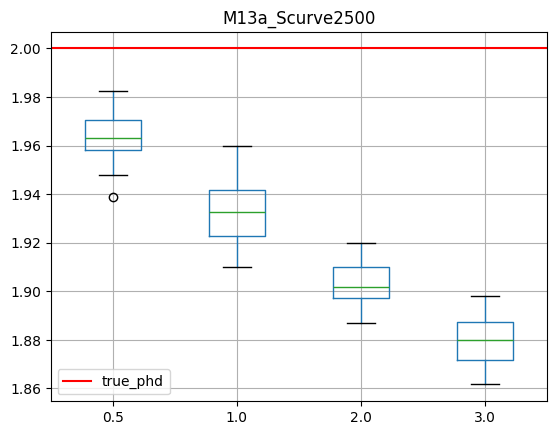

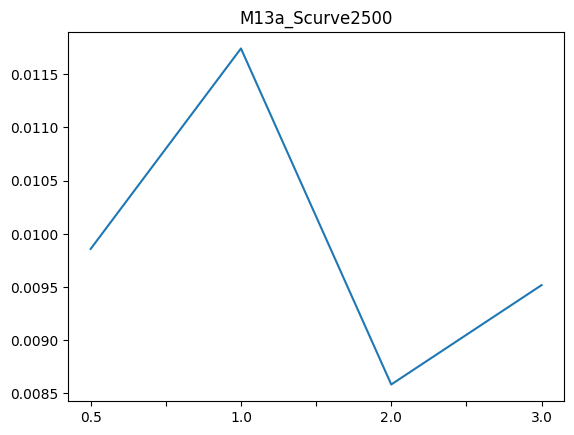

M13a_Scurve1250


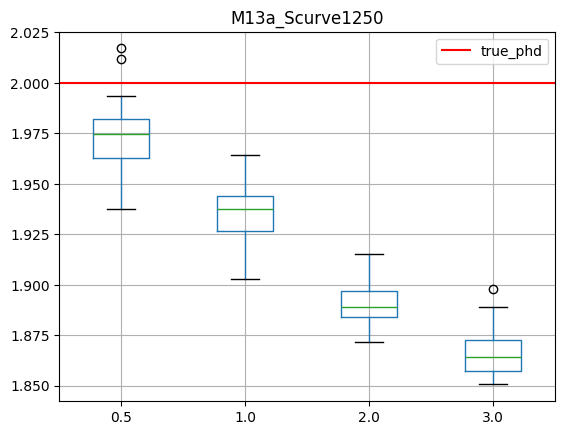

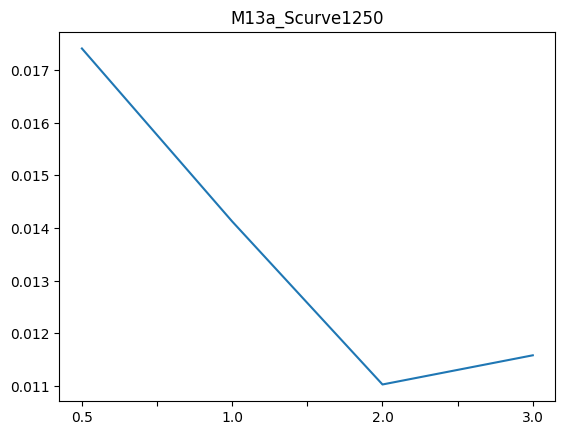

M13b_Spiral2500


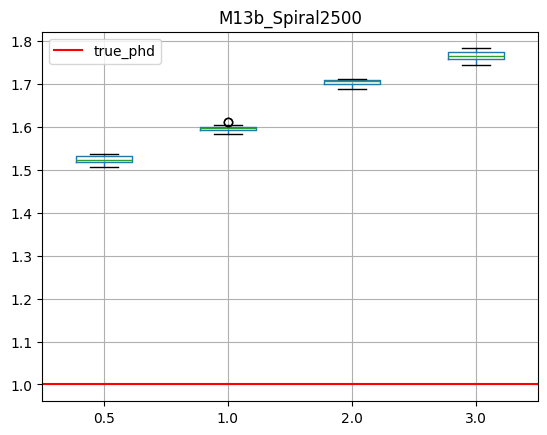

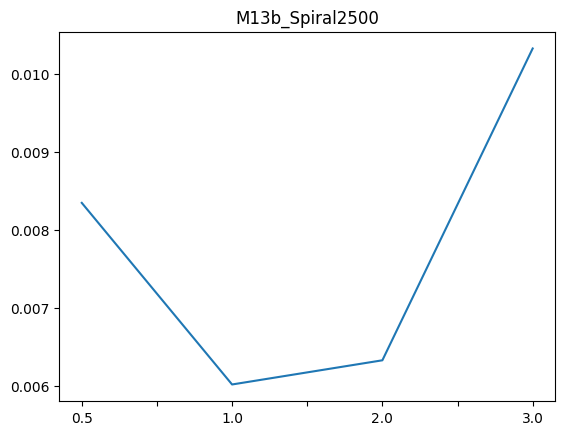

M13b_Spiral1250


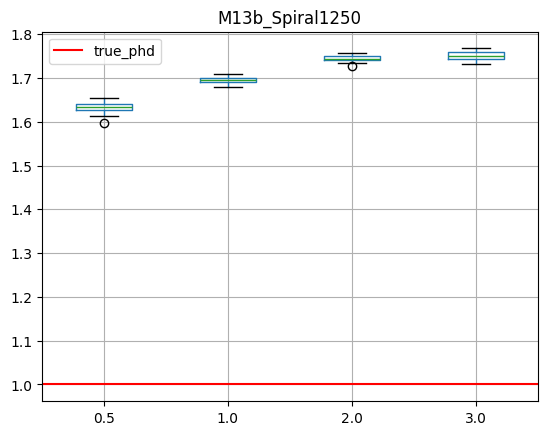

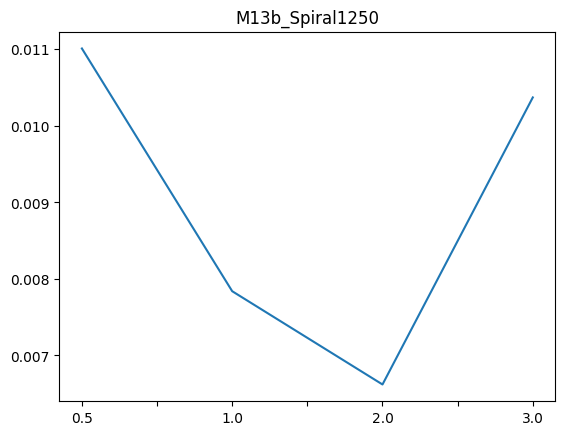

Mbeta2500


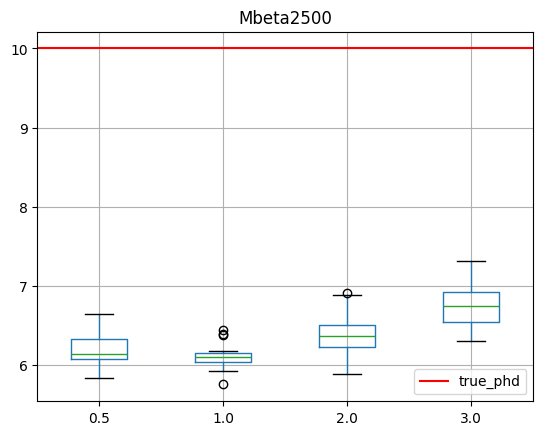

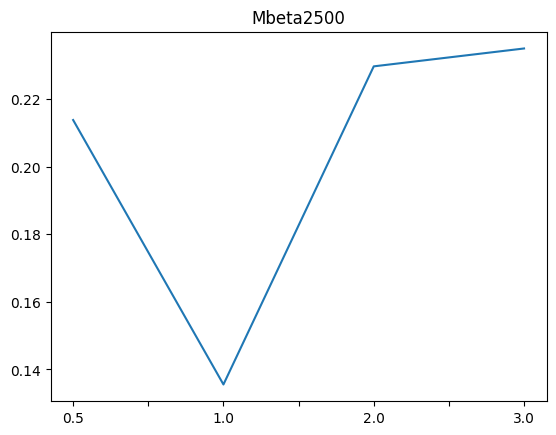

Mbeta1250


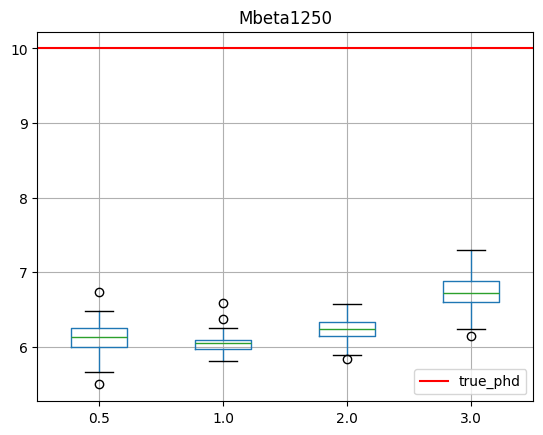

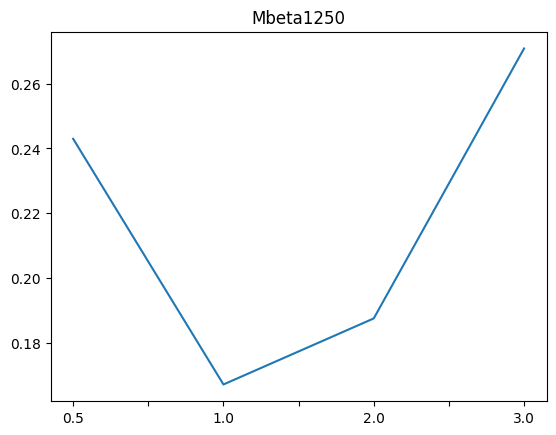

Mn1_Nonlinear2500


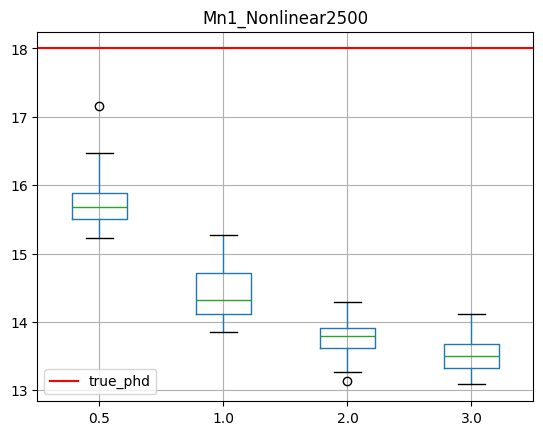

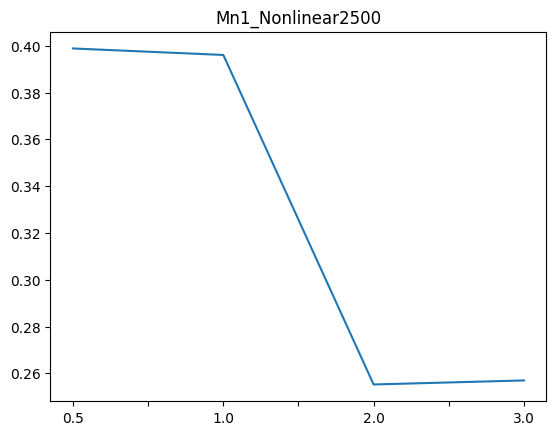

Mn1_Nonlinear1250


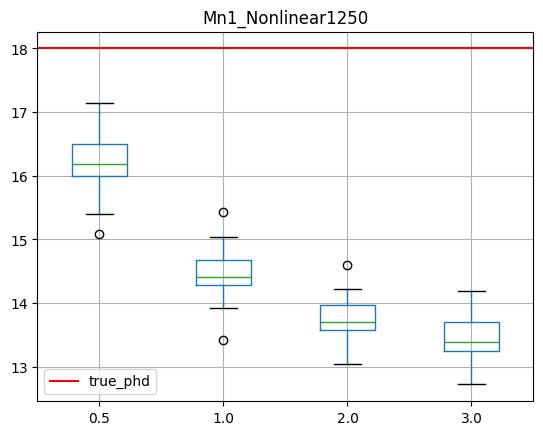

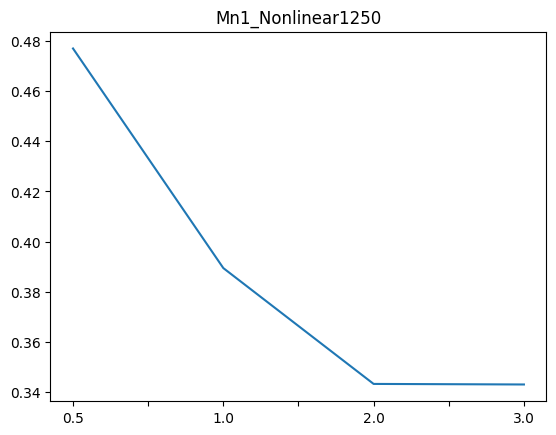

Mn2_Nonlinear2500


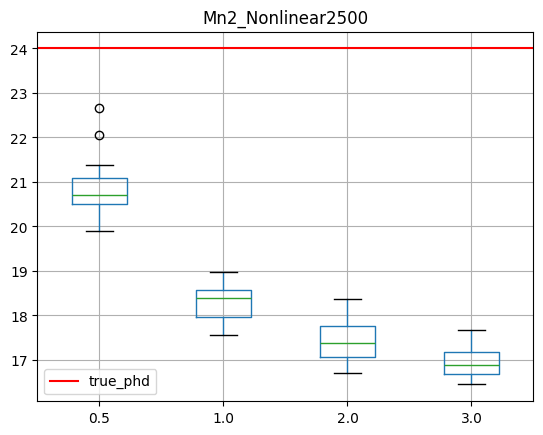

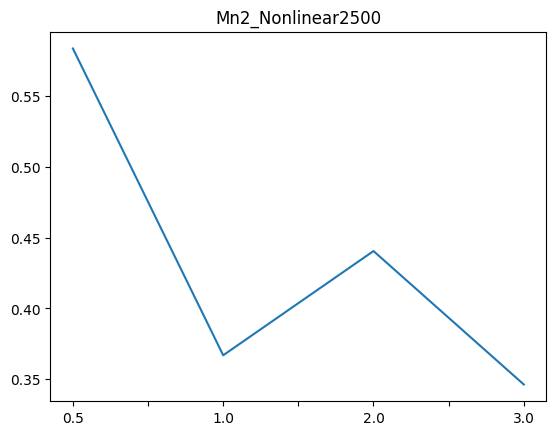

Mn2_Nonlinear1250


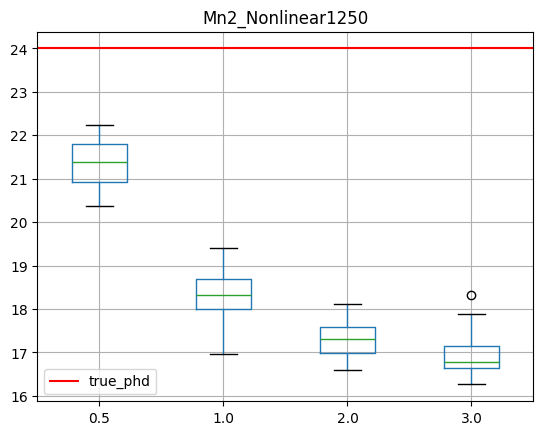

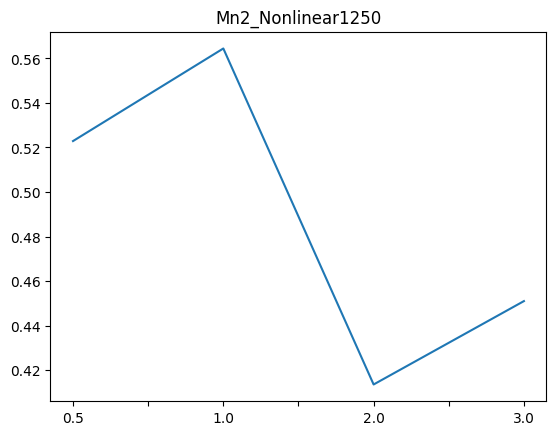

Mp1_Paraboloid2500


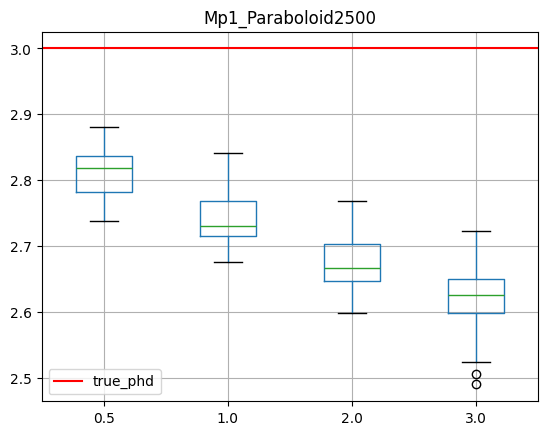

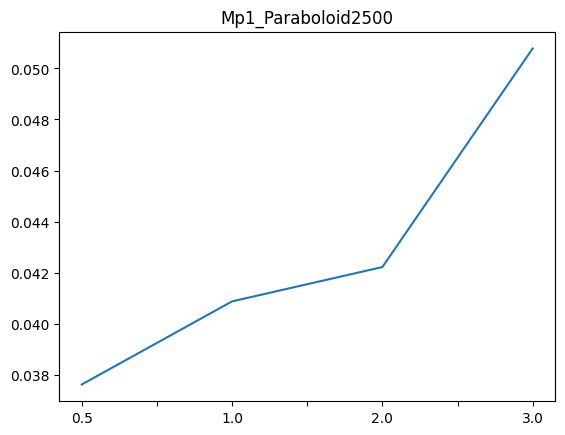

Mp1_Paraboloid1250


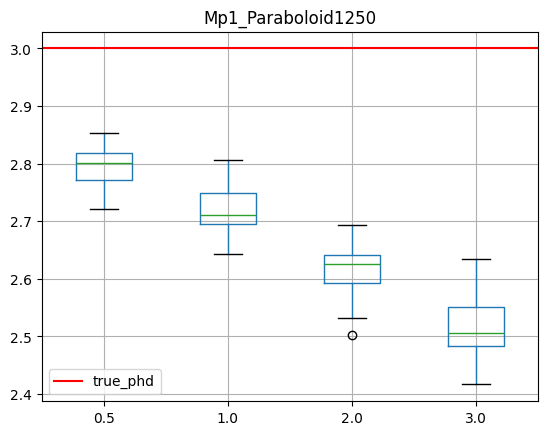

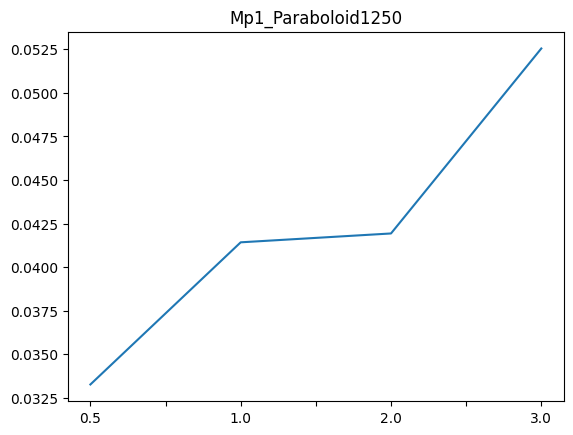

Mp2_Paraboloid2500


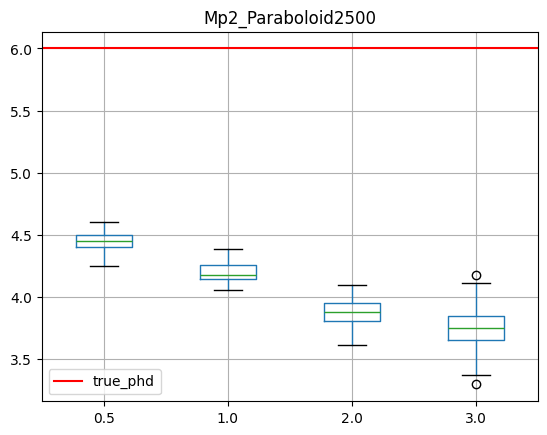

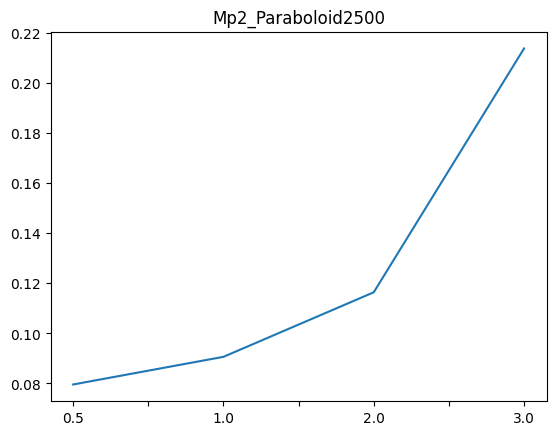

Mp2_Paraboloid1250


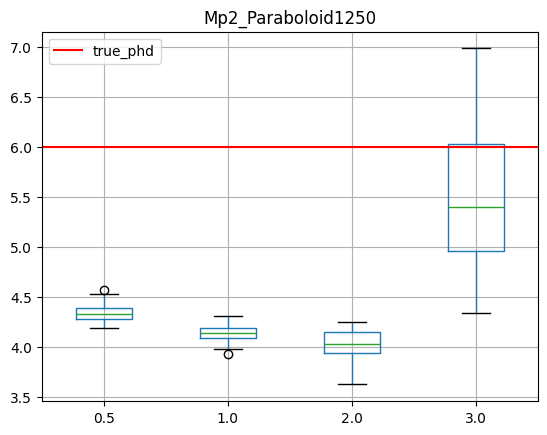

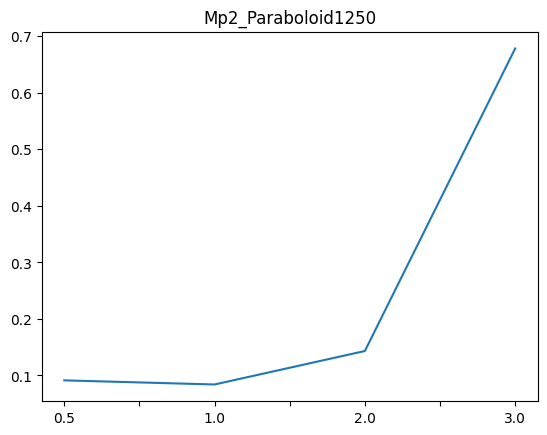

Mp3_Paraboloid2500


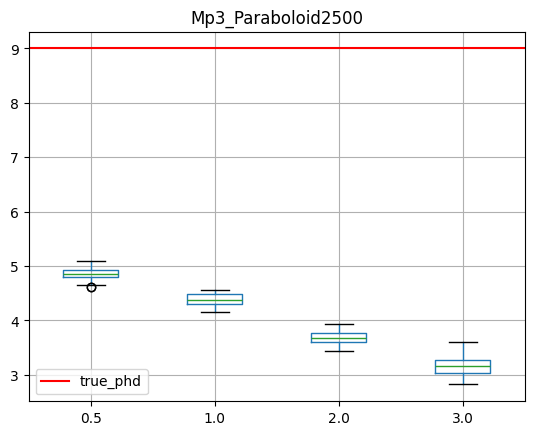

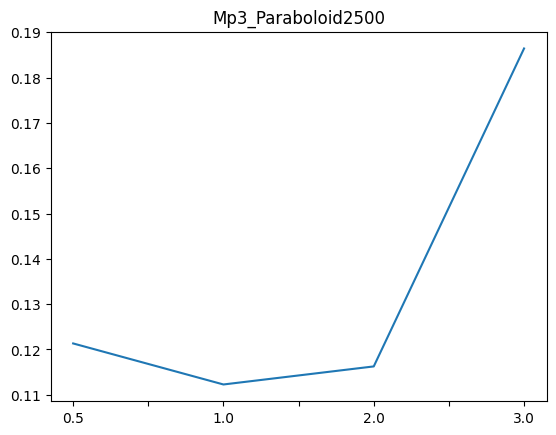

Mp3_Paraboloid1250


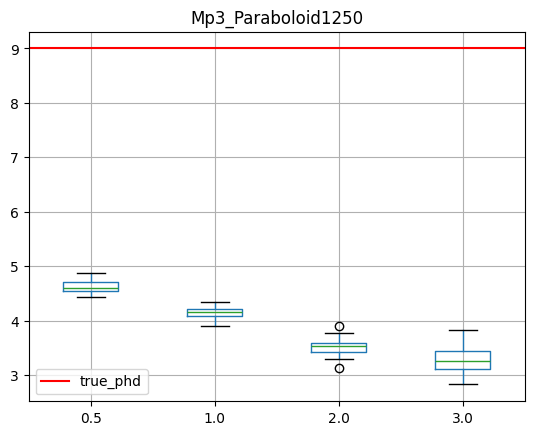

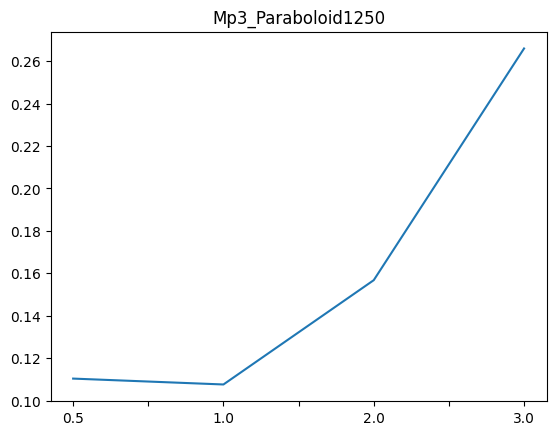

In [64]:
import matplotlib.pyplot as plt


for key in manifold_name2df.keys():
    print(key)
    new_key = key[:-4]
    true_phd = truth.query("index == @new_key")['Intrinsic Dimension'].values
    df_concat.query("manifold_name_full == @key").drop(['n_dots', 0.1], axis=1).boxplot()
    plt.axhline(y=true_phd, color='r', linestyle='-', label='true_phd')
    plt.legend()
    plt.title(key)
    plt.savefig(key + '_without_01.png')
    plt.show()
    df_concat.query("manifold_name_full == @key").drop('n_dots', axis=1)[[0.5, 1.0, 2.0, 3.0]].std().plot()
    plt.title(key)
    plt.savefig(key + '_without_01_std.png')
    plt.show()

In [89]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, axs = plt.subplots(nrows=2,  ncols=2)

key = "M2_Affine_3to5_1250"
new_key = key[:-4]
true_phd = truth.query("index == @new_key")['Intrinsic Dimension'].values
df_concat.query("manifold_name_full == @key").drop(['n_dots', 0.1], axis=1).boxplot(ax=axs[0, 0])
# axs[0, 0].axhline(y=true_phd, color='r', linestyle='-', label='true_phd')
plt.legend()
plt.title(key)
axs[0, 0].set_title(key)
#plt.show()

key = "M4_Nonlinear1250"
true_phd = truth.query("index == @new_key")['Intrinsic Dimension'].values
df_concat.query("manifold_name_full == @key").drop(['n_dots', 0.1], axis=1).boxplot(ax=axs[1])
axs[1].axhline(y=true_phd, color='r', linestyle='-', label='true_phd')
plt.legend()
plt.title(key)
axs[1].set_title(key)

key = "M5a_Helix1d1250_without_01"
true_phd = truth.query("index == @new_key")['Intrinsic Dimension'].values
df_concat.query("manifold_name_full == @key").drop(['n_dots', 0.1], axis=1).boxplot(ax=axs[2])
axs[2].axhline(y=true_phd, color='r', linestyle='-', label='true_phd')
plt.legend()
plt.title(key)
axs[2].set_title(key)


plt.tight_layout()

plt.savefig("different_behavior.png")

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

In [5]:
# df_concat.to_csv("smth_strange_phd_full.csv", index=False)
df_concat = pd.read_csv("smth_strange_phd_full.csv")

In [7]:
df_grouped = df_concat.drop('manifold_name', axis=1).groupby('manifold_name_full').mean()
df_grouped = df_grouped.reset_index()
df_grouped['manifold_name'] = df_grouped['manifold_name_full'].str[:-4]
df_joined = df_grouped.set_index('manifold_name').join(truth.set_index('index'))

In [8]:
df_joined

,manifold_name_full,0.1,0.5,1.0,2.0,3.0,n_dots,Intrinsic Dimension,Number of variables,Description
manifold_name,,,,,,,,,,
M10a_Cubic,M10a_Cubic1250,22.868665,9.750434,9.068105,8.768099,8.631042,1250.0,10,11,10D hypercube
M10a_Cubic,M10a_Cubic2500,18.990332,9.642424,9.120742,8.811872,8.675308,2500.0,10,11,10D hypercube
M10b_Cubic,M10b_Cubic1250,148.800006,15.880646,14.209018,13.533500,13.242278,1250.0,17,18,17D hypercube
M10b_Cubic,M10b_Cubic2500,68.459831,15.498289,14.083839,13.455346,13.267407,2500.0,17,18,17D hypercube
M10c_Cubic,M10c_Cubic1250,-83.999759,21.607541,18.753370,17.455265,16.990989,1250.0,24,25,24D hypercube
M10c_Cubic,M10c_Cubic2500,-236.371946,21.018606,18.639332,17.639635,17.269982,2500.0,24,25,24D hypercube
M10d_Cubic,M10d_Cubic1250,-23.254100,67.655408,44.916301,38.403385,36.482767,1250.0,70,71,70D hypercube
M10d_Cubic,M10d_Cubic2500,-30.076952,59.916342,43.125441,38.241859,36.668679,2500.0,70,71,70D hypercube
M11_Moebius,M11_Moebius1250,2.362968,2.093872,2.073523,2.094655,2.131166,1250.0,2,3,Möebius band 10-times twisted


In [15]:
errors = df_joined[['Intrinsic Dimension']].values - df_joined[['0.1', '0.5', '1.0', '2.0', '3.0']].values

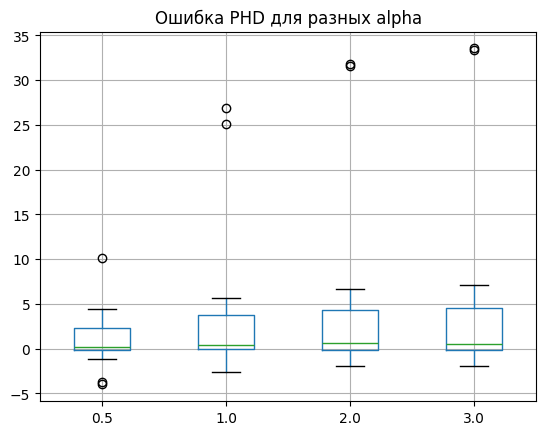

In [18]:
import matplotlib.pyplot as plt


pd.DataFrame(errors, columns=[0.1, 0.5, 1.0, 2.0, 3.0]).astype(float).drop(0.1, axis=1).boxplot()
plt.title("Ошибкa PHD для разных alpha")
plt.show()

In [63]:
pd.DataFrame(errors, columns=[0.1, 0.5, 1.0, 2.0, 3.0]).astype(float).drop(0.1, axis=1).abs().mean()


0.5    1.519101
1.0    2.889521
2.0    3.389876
3.0    3.538808
dtype: float64

In [71]:
pd.DataFrame(errors, columns=[0.1, 0.5, 1.0, 2.0, 3.0]).astype(float).abs().rank(axis=1).mean()

0.1    4.208333
0.5    1.666667
1.0    2.145833
2.0    3.083333
3.0    3.895833
dtype: float64

In [79]:
pd.DataFrame(errors, columns=[0.1, 0.5, 1.0, 2.0, 3.0]).astype(float).drop(0.1, axis=1).abs().rank(axis=1).mean()

0.5    1.541667
1.0    1.979167
2.0    2.833333
3.0    3.645833
dtype: float64

In [72]:
pd.DataFrame(errors, columns=[0.1, 0.5, 1.0, 2.0, 3.0]).astype(float).abs().rank(axis=1).median()

0.1    5.0
0.5    1.0
1.0    2.0
2.0    3.0
3.0    4.0
dtype: float64

In [40]:
df_grouped.set_index('manifold_name').join(

,manifold_name_full,0.1,0.5,1.0,2.0,3.0,n_dots,manifold_name
0,M10a_Cubic1250,22.868665,9.750434,9.068105,8.768099,8.631042,1250.0,M10a_Cubic
1,M10a_Cubic2500,18.990332,9.642424,9.120742,8.811872,8.675308,2500.0,M10a_Cubic
2,M10b_Cubic1250,148.800006,15.880646,14.209018,13.533500,13.242278,1250.0,M10b_Cubic
3,M10b_Cubic2500,68.459831,15.498289,14.083839,13.455346,13.267407,2500.0,M10b_Cubic
4,M10c_Cubic1250,-83.999759,21.607541,18.753370,17.455265,16.990989,1250.0,M10c_Cubic
5,M10c_Cubic2500,-236.371946,21.018606,18.639332,17.639635,17.269982,2500.0,M10c_Cubic
6,M10d_Cubic1250,-23.254100,67.655408,44.916301,38.403385,36.482767,1250.0,M10d_Cubic
7,M10d_Cubic2500,-30.076952,59.916342,43.125441,38.241859,36.668679,2500.0,M10d_Cubic
8,M11_Moebius1250,2.362968,2.093872,2.073523,2.094655,2.131166,1250.0,M11_Moebius
9,M11_Moebius2500,2.296546,2.076014,2.065821,2.073715,2.102187,2500.0,M11_Moebius


In [33]:
df_concat

,0.1,0.5,1.0,2.0,3.0,n_dots,manifold_name,manifold_name_full
0,20.444122,9.937994,9.532013,8.906921,8.888123,2500,M1_Sphere,M1_Sphere2500
1,19.594751,9.842767,9.400619,8.947848,9.030889,2500,M1_Sphere,M1_Sphere2500
2,19.758680,9.788471,9.275491,9.042292,8.883733,2500,M1_Sphere,M1_Sphere2500
3,19.053775,9.787282,9.203778,9.039167,8.979449,2500,M1_Sphere,M1_Sphere2500
4,18.866847,9.971427,9.162605,8.838106,8.976268,2500,M1_Sphere,M1_Sphere2500
...,...,...,...,...,...,...,...,...
25,6.535003,4.772624,4.236517,3.596394,3.153164,1250,Mp3_Paraboloid,Mp3_Paraboloid1250
26,6.634669,4.542646,4.169537,3.407964,2.867259,1250,Mp3_Paraboloid,Mp3_Paraboloid1250
27,6.326574,4.587170,4.200290,3.699747,2.867168,1250,Mp3_Paraboloid,Mp3_Paraboloid1250
28,6.384184,4.872383,4.238474,3.556651,3.331391,1250,Mp3_Paraboloid,Mp3_Paraboloid1250


In [30]:
df_concat.set_index('manifold_name').join(truth.set_index('index'))

,0.1,0.5,1.0,2.0,3.0,n_dots,manifold_name_full,Intrinsic Dimension,Number of variables,Description
manifold_name,,,,,,,,,,
M1_Sphere,20.444122,9.937994,9.532013,8.906921,8.888123,2500,M1_Sphere2500,10,11,10D sphere linearly embedded
M1_Sphere,19.594751,9.842767,9.400619,8.947848,9.030889,2500,M1_Sphere2500,10,11,10D sphere linearly embedded
M1_Sphere,19.758680,9.788471,9.275491,9.042292,8.883733,2500,M1_Sphere2500,10,11,10D sphere linearly embedded
M1_Sphere,19.053775,9.787282,9.203778,9.039167,8.979449,2500,M1_Sphere2500,10,11,10D sphere linearly embedded
M1_Sphere,18.866847,9.971427,9.162605,8.838106,8.976268,2500,M1_Sphere2500,10,11,10D sphere linearly embedded
...,...,...,...,...,...,...,...,...,...,...
Mp3_Paraboloid,6.535003,4.772624,4.236517,3.596394,3.153164,1250,Mp3_Paraboloid1250,9,30,"9D paraboloid, nonlinearly embedded in (3*(9+1..."
Mp3_Paraboloid,6.634669,4.542646,4.169537,3.407964,2.867259,1250,Mp3_Paraboloid1250,9,30,"9D paraboloid, nonlinearly embedded in (3*(9+1..."
Mp3_Paraboloid,6.326574,4.587170,4.200290,3.699747,2.867168,1250,Mp3_Paraboloid1250,9,30,"9D paraboloid, nonlinearly embedded in (3*(9+1..."


In [31]:
df_concat

,0.1,0.5,1.0,2.0,3.0,n_dots,manifold_name,manifold_name_full
0,20.444122,9.937994,9.532013,8.906921,8.888123,2500,M1_Sphere,M1_Sphere2500
1,19.594751,9.842767,9.400619,8.947848,9.030889,2500,M1_Sphere,M1_Sphere2500
2,19.758680,9.788471,9.275491,9.042292,8.883733,2500,M1_Sphere,M1_Sphere2500
3,19.053775,9.787282,9.203778,9.039167,8.979449,2500,M1_Sphere,M1_Sphere2500
4,18.866847,9.971427,9.162605,8.838106,8.976268,2500,M1_Sphere,M1_Sphere2500
...,...,...,...,...,...,...,...,...
25,6.535003,4.772624,4.236517,3.596394,3.153164,1250,Mp3_Paraboloid,Mp3_Paraboloid1250
26,6.634669,4.542646,4.169537,3.407964,2.867259,1250,Mp3_Paraboloid,Mp3_Paraboloid1250
27,6.326574,4.587170,4.200290,3.699747,2.867168,1250,Mp3_Paraboloid,Mp3_Paraboloid1250
28,6.384184,4.872383,4.238474,3.556651,3.331391,1250,Mp3_Paraboloid,Mp3_Paraboloid1250


In [22]:
df_concat.to_csv("phd2diff_alpha_full.csv", index=False)